개요<br>
1 import - 2 데이터 전처리 - 3 데이터분석(plot) - <br>
4 변수설정 및 모델선택,예측값 얻기 - 5 값비교 - 6 마무리(plot)

## 1. import

In [105]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split



## 2. 데이터 전처리
survived,pclass,sex,embarked: unique나 value_counts 사용해서 값 종류 확인<br>
id,name,ticket 중복값(duplicate) 있는지 확인<br>
Age,SibSp,Parch,Fare 값 범위 확인 등등. 또, 전체적으로 na값(not a number 또는 null) 있는지 체크


In [106]:
## 데이터 불러오기
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

## SibSp(함께 탑승한 형제 또는 배우자 수), Parch(함께 탑승한 부모 또는 자녀 수)
## Cabin(선실번호), Embarked(탑승장소 S: Southhampton, C: Cherbourg, Q: Queenstown)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [107]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [108]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [109]:
train_data["Age"].notna().sum() # "Age" column애서 na(not a number 또는 null)값이 아닌 값의 갯수

714

In [110]:
train_data[train_data["Age"].notna()].count()

PassengerId    714
Survived       714
Pclass         714
Name           714
Sex            714
Age            714
SibSp          714
Parch          714
Ticket         714
Fare           714
Cabin          185
Embarked       712
dtype: int64

In [111]:
## feature 에 들어가는 nan값 다 삭제해야 머신러닝모델 실행됨 (RandomForestClassifier는 안그러나?)
train_data = train_data[train_data["Age"].notna()] # Age 값이 na 인 행 삭제
test_data = test_data[test_data["Age"].notna()]
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [112]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C


In [113]:
train_data.index = train_data["PassengerId"]
train_data = train_data.drop(["PassengerId"], axis=1)
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [114]:
## 이외에도 다른 column들 data cleaning 해야됨, test_data도 해야됨

## 3. 데이터분석(plot)

In [115]:
(0 < train_data["Age"]) & (train_data["Age"] < 20)

PassengerId
1      False
2      False
3      False
4      False
5      False
       ...  
886    False
887    False
888     True
890    False
891    False
Name: Age, Length: 714, dtype: bool

([<matplotlib.patches.Wedge at 0x25e135e6eb0>,
 [Text(-0.4509447427781559, 1.0033189118922972, 'male'),
  Text(0.4509447427781556, -1.0033189118922972, 'female')])

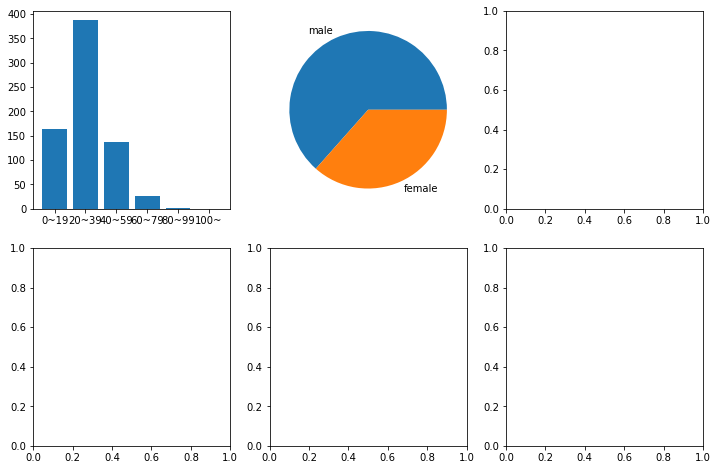

In [116]:
plot_objects = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
fig, ((age, sex, SibSp), (Parch, blank1, blank2)) = plot_objects
## 나이대별 그래프
age0019 = train_data[(0 <= train_data["Age"]) & (train_data["Age"] < 20)].shape[0]
age2039 = train_data[(20 <= train_data["Age"]) & (train_data["Age"] < 40)].shape[0]
age4059 = train_data[(40 <= train_data["Age"]) & (train_data["Age"] < 60)].shape[0]
age6079 = train_data[(60 <= train_data["Age"]) & (train_data["Age"] < 80)].shape[0]
age8099 = train_data[(80 <= train_data["Age"]) & (train_data["Age"] < 100)].shape[0]
age100 = train_data[(100 <= train_data["Age"])].shape[0]
age.bar(["0~19", "20~39", "40~59", "60~79","80~99","100~"],
       [age0019, age2039, age4059, age6079, age8099, age100])

M = (train_data["Sex"] == 'male').sum()
F = train_data[train_data["Sex"] == 'female'].shape[0]
## 성별 Pie 그래프
sex.pie([M,F], labels=["male", "female"])
## 등등 필요한 그래프





## 4. 변수설정 및 모델선택, 예측값 얻기

In [117]:
## feature에 들어가는 column들 값은 숫자만 되는 듯 => 성별 숫자로 바꿔야 됨

#train_data[train_data.Sex == "male"].Sex = 1 # 이건 실행 안됨

train_data.loc[train_data.Sex == "male", "Sex"] = 1 # 이렇게 loc 써야됨
train_data.loc[train_data.Sex == "female", "Sex"] = 2

test_data.loc[test_data.Sex == "male", "Sex"] = 1 # 이렇게 loc 써야됨
test_data.loc[test_data.Sex == "female", "Sex"] = 2


In [118]:
train_data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,3,"Rice, Mrs. William (Margaret Norton)",2,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,S


In [119]:
test_data[test_data.notna()].count()

PassengerId    332
Pclass         332
Name           332
Sex            332
Age            332
SibSp          332
Parch          332
Ticket         332
Fare           331
Cabin           87
Embarked       332
dtype: int64

In [120]:
## target 및 features 설정
train_y = train_data.Survived
# test_y = test_data.Survived



features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
train_X = train_data[features]
test_X = test_data[features]

# titan_model = DecisionTreeRegressor(random_state=1)
titan_model = RandomForestRegressor(random_state=1)
titan_model.fit(train_X, train_y)
pred_y = titan_model.predict(test_X)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

#### 5. 값비교(해야되는데 여기선 test 변수의 target인 survived가 없어서 kaggle에 제출 후 점수로 확인)

In [ ]:
# mae = mean_absolute_error(test_y, pred_y)

## 6. 마무리(모델수정 후 predict value 변화를 plot)

In [ ]:
plt.plot(pred_y)